In [1]:
# Import the pandas library for handling data in tables (DataFrames)
import pandas as pd

In [3]:
# Import matplotlib to create visualizations and plots
import matplotlib.pyplot as plt

In [5]:
# Import seaborn for creating more attractive and informative statistical graphics
import seaborn as sns

In [7]:
# Import CountVectorizer to convert text data into a bag-of-words (numeric) format
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# Import WordCloud to generate word cloud visualizations from text data
from wordcloud import WordCloud

In [11]:
# Load the sentiment results CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\Amirul Jasli\OneDrive\Desktop\Text Analytics\Project\Project R&B Part 2\sentiment_results.csv")

In [13]:
# Take a random sample of 100 rows from the dataset for visualization
sample_df = df.sample(100, random_state=42)

# Initialize CountVectorizer to extract the 20 most common words, excluding English stopwords
vectorizer = CountVectorizer(max_features=20, stop_words='english')

# Fit and transform the 'tokenized' column to get word frequency counts
X = vectorizer.fit_transform(sample_df['tokenized'])

# Get the list of extracted terms (words)
terms = vectorizer.get_feature_names_out()

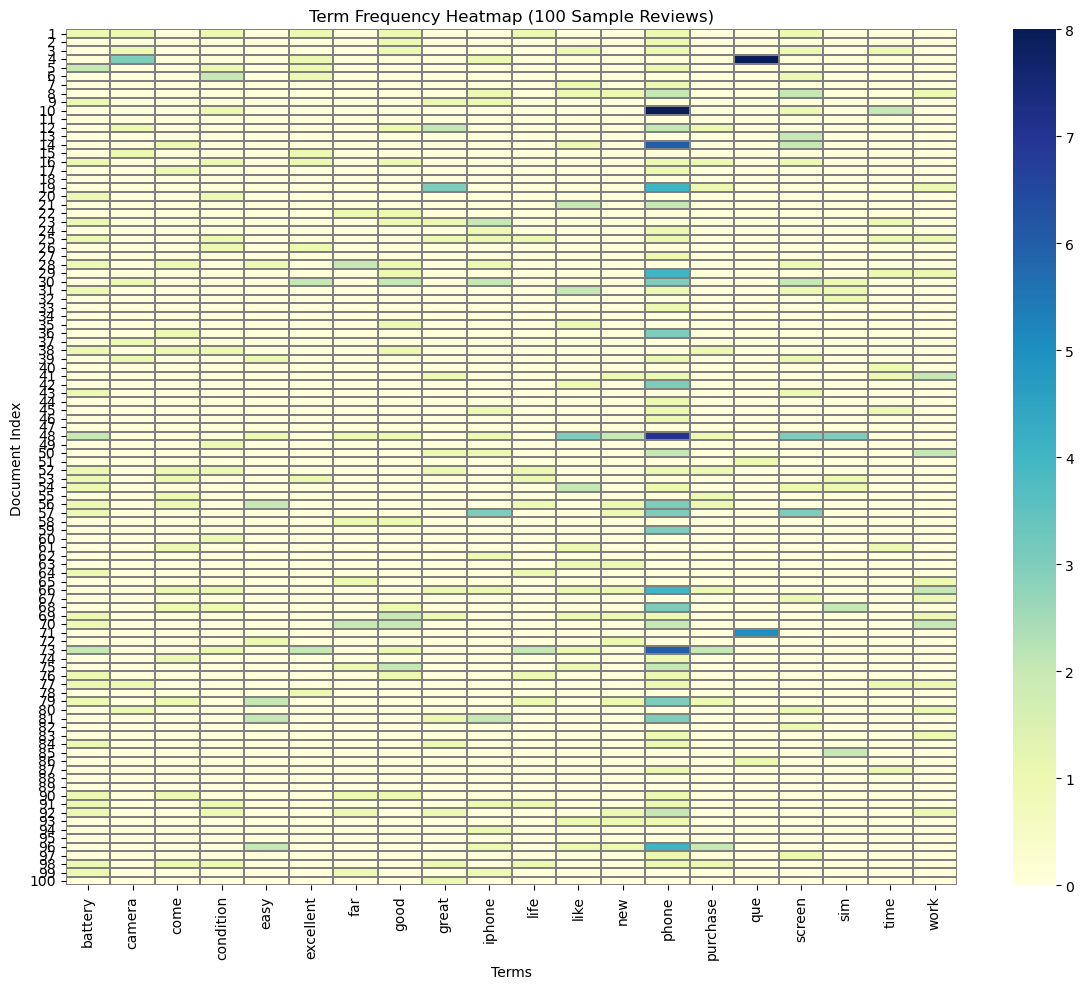

In [15]:
# Set the figure size for the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap to visualize the frequency of the top 20 terms across 100 sample reviews
sns.heatmap(
    X.toarray(),                 # Convert the sparse matrix to a dense array for plotting
    cmap='YlGnBu',               # Use a yellow-green-blue color map
    xticklabels=terms,           # Label x-axis with the top terms
    yticklabels=range(1, 101),   # Label y-axis with document index (1 to 100)
    linewidths=0.3,              # Add space between the cells
    linecolor='gray'             # Set line color between cells
)

# Add plot title and axis labels
plt.title("Term Frequency Heatmap (100 Sample Reviews)")
plt.xlabel("Terms")
plt.ylabel("Document Index")

# Adjust layout to fit labels and content
plt.tight_layout()

# Show the heatmap
plt.show()

In [17]:
# Combine all tokenized text into one string
all_text = " ".join(df['tokenized'])

# Generate a word cloud from the text
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_text)

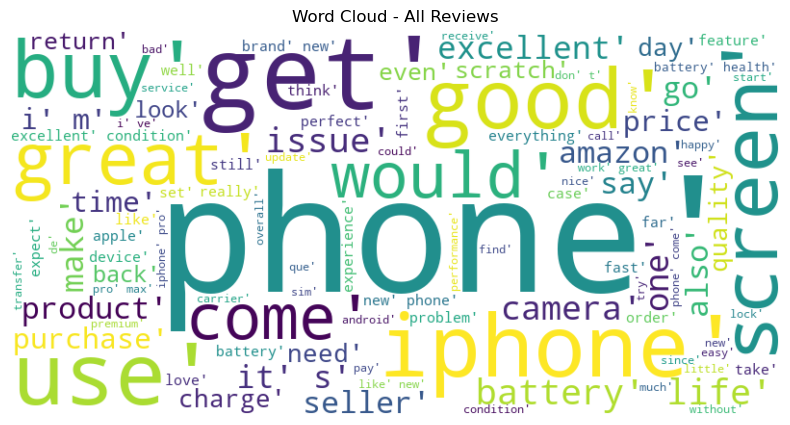

In [19]:
# Set the size of the word cloud plot
plt.figure(figsize=(10, 5))

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')

# Hide the axes
plt.axis('off')

# Add a title to the plot
plt.title("Word Cloud - All Reviews")

# Show the plot
plt.show()

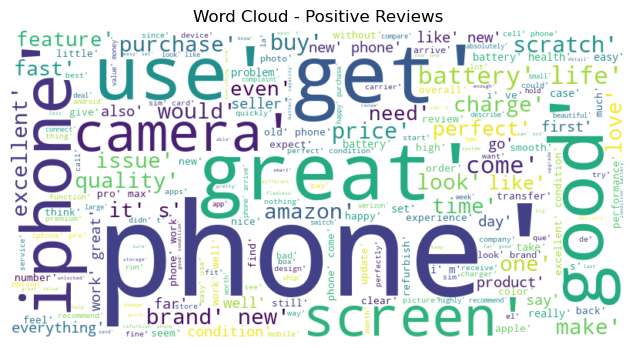

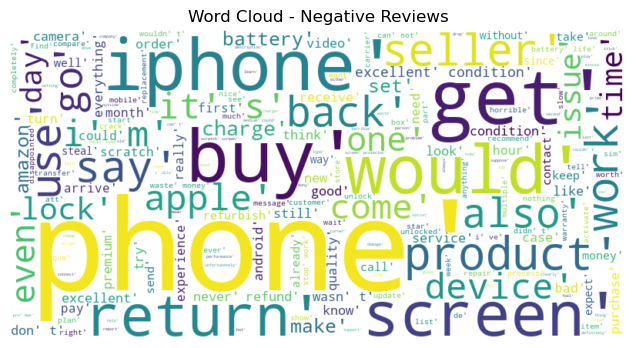

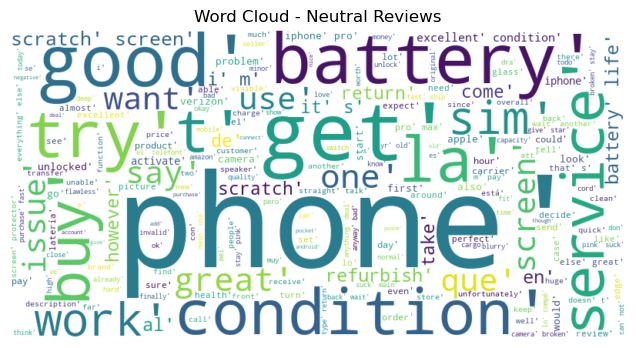

In [21]:
# Loop through each sentiment category and generate a word cloud for each
for sentiment in ['positive', 'negative', 'neutral']:
    # Combine all tokenized text for the current sentiment
    text = " ".join(df[df['sentiment'] == sentiment]['tokenized'])

    # Generate the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment.capitalize()} Reviews")
    plt.show()

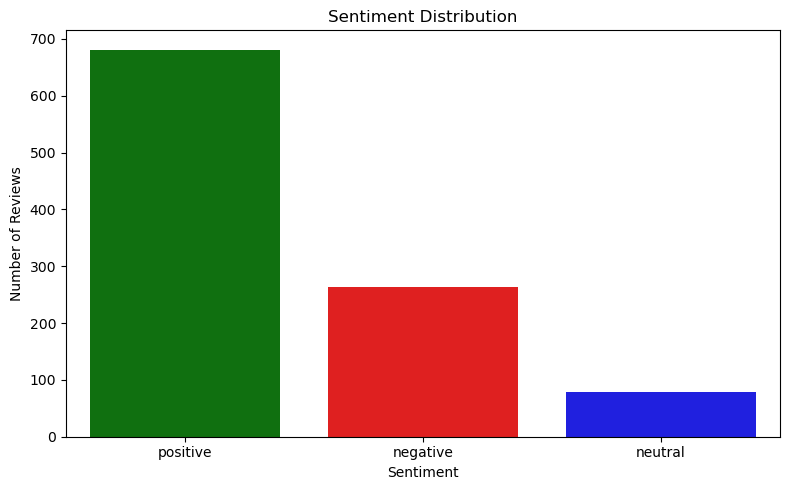

In [23]:
# Count the number of reviews for each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Set the figure size for the bar plot
plt.figure(figsize=(8, 5))

# Create a bar plot for sentiment distribution
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['green', 'red', 'blue'])

# Add title and axis labels
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Adjust layout to fit elements
plt.tight_layout()

# Show the plot
plt.show()